In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("/content/preprocessed_data.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Income               2205 non-null   float64
 1   Kidhome              2205 non-null   int64  
 2   Teenhome             2205 non-null   int64  
 3   Recency              2205 non-null   int64  
 4   MntWines             2205 non-null   int64  
 5   MntFruits            2205 non-null   int64  
 6   MntMeatProducts      2205 non-null   int64  
 7   MntFishProducts      2205 non-null   int64  
 8   MntSweetProducts     2205 non-null   int64  
 9   MntGoldProds         2205 non-null   int64  
 10  NumDealsPurchases    2205 non-null   int64  
 11  NumWebPurchases      2205 non-null   int64  
 12  NumCatalogPurchases  2205 non-null   int64  
 13  NumStorePurchases    2205 non-null   int64  
 14  NumWebVisitsMonth    2205 non-null   int64  
 15  AcceptedCmp3         2205 non-null   i

MODEL FITTING

RandomForestClassifier Model

In [22]:
from sklearn.ensemble import RandomForestClassifier

# Define feature matrix X by dropping specified columns
X = df.drop(['is_accepted', 'AcceptedCmpOverall', 'AcceptedCmp1', 'AcceptedCmp2',
               'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'education'], axis=1)

# Define target variable y
y = df['AcceptedCmpOverall']

# Initialize RandomForestClassifier
clf = RandomForestClassifier()

# Train the classifier
clf.fit(X, y)


RandomForestClassifier()

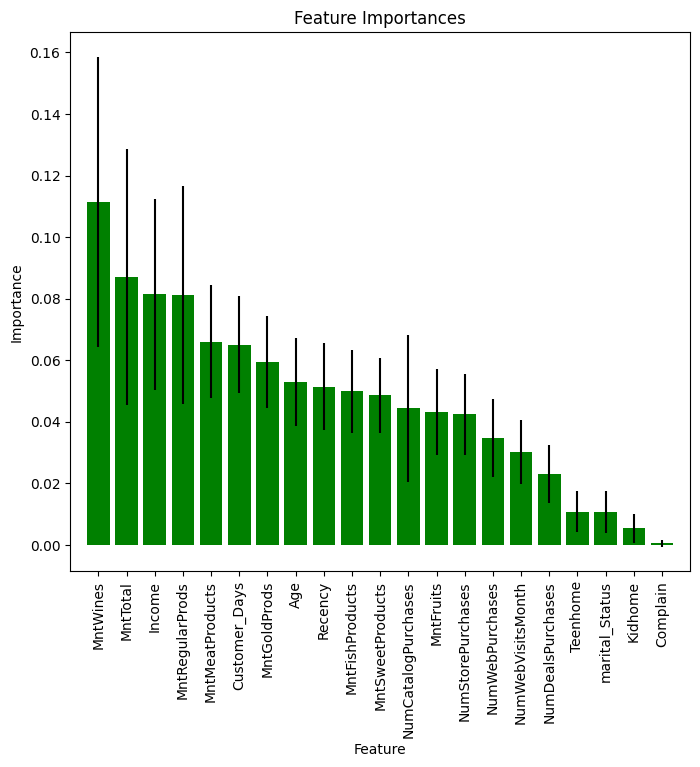

In [24]:
clf_rf = RandomForestClassifier()
clr_rf = clf_rf.fit(X, y)  # Fit the RandomForestClassifier and assign it to clr_rf
importances = clr_rf.feature_importances_

# Calculate the standard deviation of feature importances
std = np.std([tree.feature_importances_ for tree in clr_rf.estimators_], axis=0)

# Get the indices of features sorted by importance
indices = np.argsort(importances)[::-1]

# Plot the feature importances of the forest
plt.figure(figsize=(8, 7))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], color="g", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()


As we have seen, there is a strong relationship between acceptance of advertising campaigns,MntWines, income, and spending,MntGoldprods,MntMeatProducts.

<ipython-input-27-eaf2ce5ab40b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='AcceptedCmpOverall', y='MntTotal', data=df,palette='Blues_r');


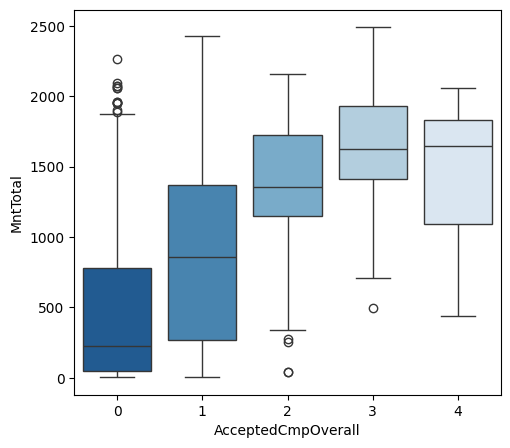

In [27]:
import seaborn as sns
plt.figure(figsize=(5.5,5))
sns.boxplot(x='AcceptedCmpOverall', y='MntTotal', data=df,palette='Blues_r');

<ipython-input-28-694df6a78fb4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='AcceptedCmpOverall', y='Income', data=df,palette='Blues_r');


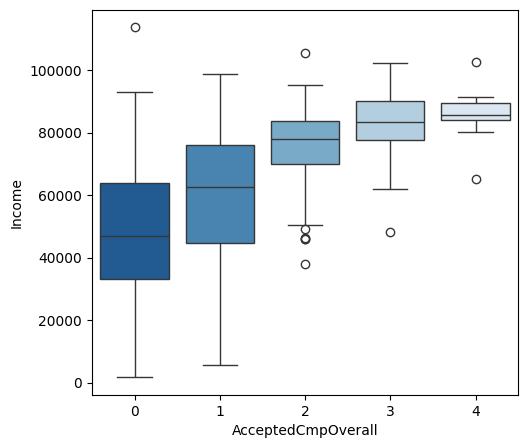

In [28]:
plt.figure(figsize=(5.5,5))
sns.boxplot(x='AcceptedCmpOverall', y='Income', data=df,palette='Blues_r');

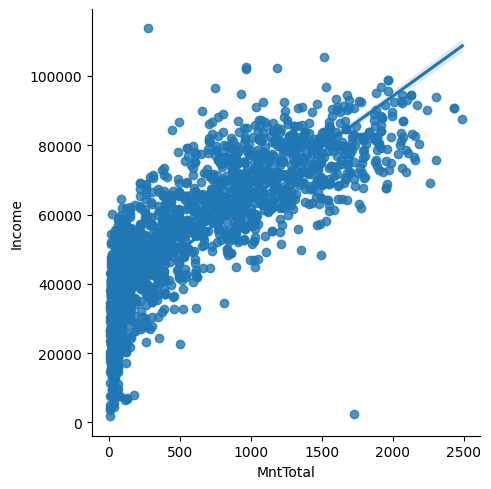

In [30]:
sns.lmplot(x='MntTotal', y='Income', data=df);

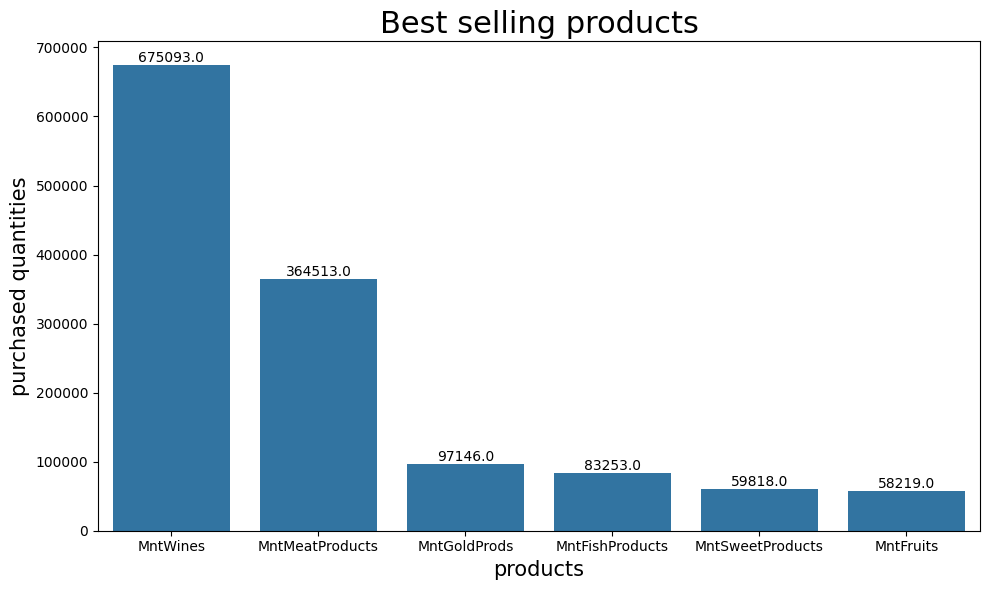

In [32]:
Products = ['MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts','MntSweetProducts','MntGoldProds']

# Create a DataFrame to store the percentage of accepted campaigns
Products_df  = pd.DataFrame(df[Products ].sum(), columns=['Sum']).reset_index()

# Set the figure size
plt.figure(figsize=(10, 6))

# Create the bar plot
ax = sns.barplot(x='index', y='Sum', data=Products_df.sort_values('Sum', ascending=False))

# Set labels and title
plt.xlabel('products' ,size=15)
plt.ylabel('purchased quantities' ,size=15)
plt.title('Best selling products',size=22)

# Add percentage labels on top of each bar
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

# Display the plot
plt.tight_layout()
plt.show()

<b fontsize = 32px>CLUSTERING

In [9]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Select numeric columns for standardization
numeric_columns = [
    'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
    'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
    'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
    'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4',
    'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response',
    'Age', 'Customer_Days', 'MntTotal', 'MntRegularProds',
    'AcceptedCmpOverall', 'marital_Status'
]

# Extract the numeric data
numeric_data = df[numeric_columns]

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to your numeric data
scaler.fit(numeric_data)

# Transform your numeric data using the fitted scaler
scaled_numeric_data = scaler.transform(numeric_data)

# Convert the scaled data back to a DataFrame
scaled_numeric_df = pd.DataFrame(scaled_numeric_data, columns=numeric_columns)

# Concatenate the scaled numeric data with non-numeric columns
scaled_data = pd.concat([scaled_numeric_df, df.drop(columns=numeric_columns)], axis=1)

# Now scaled_data contains all columns with numeric values standardized


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Income               2205 non-null   float64
 1   Kidhome              2205 non-null   int64  
 2   Teenhome             2205 non-null   int64  
 3   Recency              2205 non-null   int64  
 4   MntWines             2205 non-null   int64  
 5   MntFruits            2205 non-null   int64  
 6   MntMeatProducts      2205 non-null   int64  
 7   MntFishProducts      2205 non-null   int64  
 8   MntSweetProducts     2205 non-null   int64  
 9   MntGoldProds         2205 non-null   int64  
 10  NumDealsPurchases    2205 non-null   int64  
 11  NumWebPurchases      2205 non-null   int64  
 12  NumCatalogPurchases  2205 non-null   int64  
 13  NumStorePurchases    2205 non-null   int64  
 14  NumWebVisitsMonth    2205 non-null   int64  
 15  AcceptedCmp3         2205 non-null   i

In [49]:
# Remove non-numeric columns or encode categorical columns
numeric_df = df.drop(columns=['is_accepted', 'education'])  # Assuming these are non-numeric columns
# You may need to handle other non-numeric columns similarly

# Initialize the PCA model with 8 components
pca = PCA(n_components=8)

# Fit and transform the data
df_pca = pca.fit_transform(numeric_df)


In [13]:
print(df_pca)

[[ 6.56126952e+03  1.21937960e+03 -7.79410475e+01 ... -3.08227814e+01
  -2.43321658e+01 -1.03439883e+01]
 [-5.30309856e+03 -6.57902553e+02  1.47875307e+02 ... -9.81436258e+00
  -4.76784662e+00  8.73873129e+00]
 [ 1.99878602e+04 -4.34150862e+02 -4.70327304e+01 ... -5.02305627e+01
  -4.78026988e+01  1.86813281e+01]
 ...
 [ 5.39295135e+03  8.62138896e+02  2.32947144e+02 ... -2.73064657e+01
   8.85298422e+00 -3.63799885e+01]
 [ 1.76236864e+04 -3.08173770e+02  1.38123308e+02 ...  3.02325502e+00
  -3.15934245e+01  3.54592423e+01]
 [ 1.22463398e+03 -6.17875786e+02 -3.41268553e+02 ... -8.06457430e+00
  -6.79615554e+00  9.08303873e+00]]


Determining the optimal number of clusters using Silhouette Score

In [14]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

list_k = list(range(2, 10))
silhouette_scores = []
for k in list_k:
    km = KMeans(n_clusters=k)
    preds = km.fit_predict(df_pca)
    silhouette_scores.append(silhouette_score(df_pca, preds))

best_k = list_k[np.argmax(silhouette_scores)]



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [15]:
best_k

2

In [17]:
silhouette_scores

[0.6101131892724202,
 0.5471509713298661,
 0.5335306840619715,
 0.5329659686631771,
 0.5145979751542563,
 0.5067483501092366,
 0.5124997491923715,
 0.5107406117551186]

kmeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


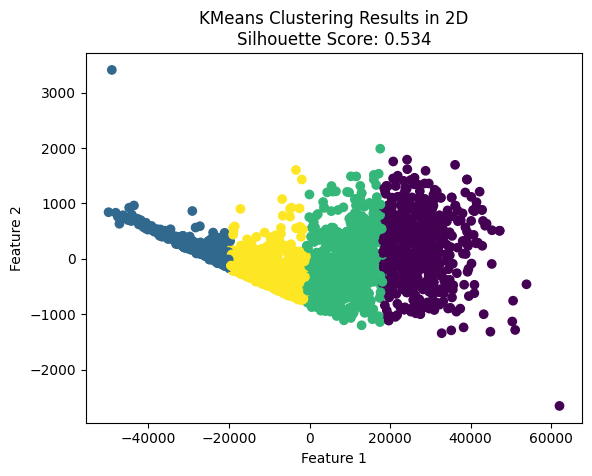

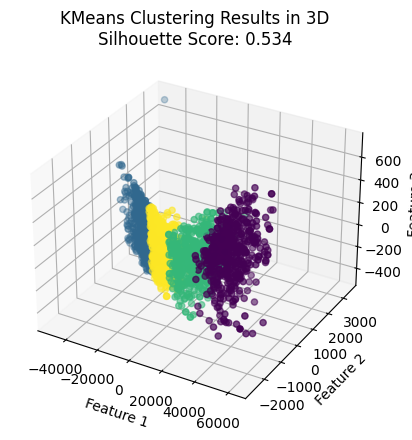

In [19]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Fit the KMeans model with the number of clusters set to 4
kmeans = KMeans(n_clusters=4)
kmeans.fit(df_pca)

# Get the predictions
predictions = kmeans.labels_

# Calculate the silhouette score
silhouette_score_value = silhouette_score(df_pca, predictions)

# Calculate the Calinski-Harabasz Index
calinski_harabasz_score_value = calinski_harabasz_score(df_pca, predictions)

# Calculate the Davies-Bouldin Index
davies_bouldin_score_value = davies_bouldin_score(df_pca, predictions)

# Visualize the results in 2D
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=predictions, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('KMeans Clustering Results in 2D\nSilhouette Score: {0:.3f}'.format(silhouette_score_value))
plt.show()

# Visualize the results in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_pca[:, 0], df_pca[:, 1], df_pca[:, 2], c=predictions, cmap='viridis')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.set_title('KMeans Clustering Results in 3D\nSilhouette Score: {0:.3f}'.format(silhouette_score_value))
plt.show()


Agglomerative Clustering


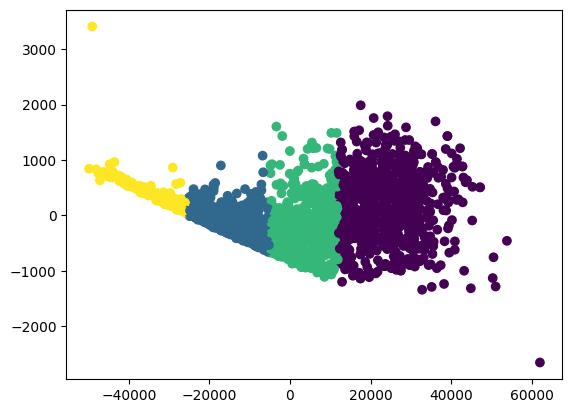

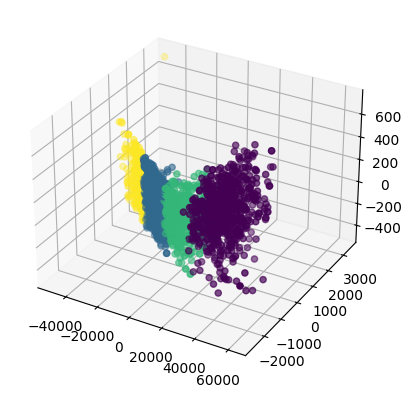

Davies-Bouldin Index: 0.5397000701123437
Silhouette Score: 0.5111134016718216
Calinski-Harabasz Index: 6676.923295674369


In [50]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import pdist, squareform
from sklearn.metrics import davies_bouldin_score

# Generate sample data
X = df_pca

# Compute the pairwise distances between samples
dist_matrix = squareform(pdist(X))

# Fit the Agglomerative Clustering model
agg_cluster = AgglomerativeClustering(n_clusters=4)
agg_cluster.fit(X)

# Plot the data points colored by their cluster labels in 2D
plt.scatter(X[:, 0], X[:, 1], c=agg_cluster.labels_, cmap='viridis')
plt.show()

# Plot the data points colored by their cluster labels in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=agg_cluster.labels_, cmap='viridis')
plt.show()

# Calculate the Davies-Bouldin Index
davies_bouldin_index = davies_bouldin_score(X, agg_cluster.labels_)
print("Davies-Bouldin Index:", davies_bouldin_index)
# Calculate the silhouette score
silhouette_score_value = silhouette_score(X, agg_cluster.labels_)

# Calculate the Calinski-Harabasz Index
calinski_harabasz_score_value = calinski_harabasz_score(X, agg_cluster.labels_)

print("Silhouette Score:", silhouette_score_value)
print("Calinski-Harabasz Index:", calinski_harabasz_score_value)

In [51]:
from sklearn.cluster import AgglomerativeClustering

# Convert numpy matrix to DataFrame
Df_pca = pd.DataFrame(df_pca)

# Now df_pca is a DataFrame

# Initialize Agglomerative Clustering model
AC = AgglomerativeClustering(n_clusters=4)

# Fit model and predict clusters
yhat_AC = AC.fit_predict(Df_pca)
Df_pca["Clustering"] = yhat_AC

# Adding the Clusters feature to the original dataframe.
df["Clusters"] = yhat_AC


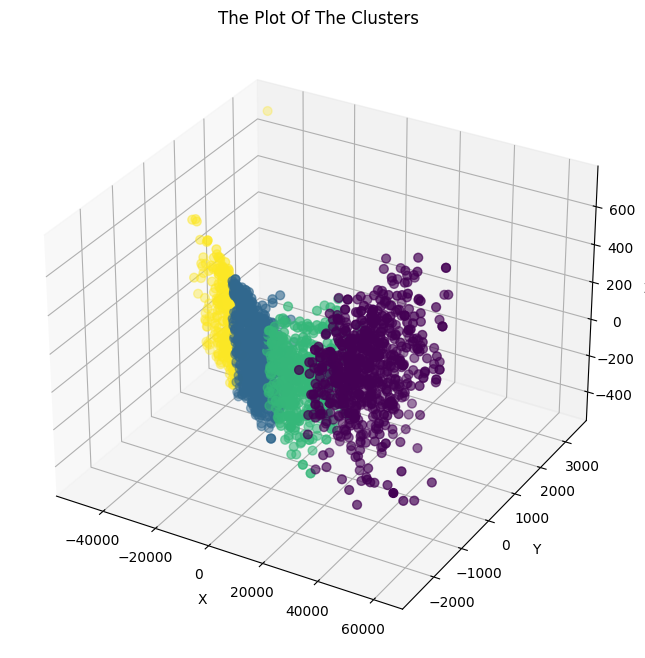

In [55]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming x, y, and z are your three dimensions in df_pca
x = Df_pca.iloc[:, 0]
y = Df_pca.iloc[:, 1]
z = Df_pca.iloc[:, 2]

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot clusters
cmap = plt.get_cmap('viridis')  # Define color map
ax.scatter(x, y, z, s=40, c=Df_pca["Clustering"], marker='o', cmap=cmap)

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('The Plot Of The Clusters')

# Show plot
plt.show()


<ipython-input-57-11198f6a1b74>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl = sns.countplot(x=df["Clusters"], palette= pal)


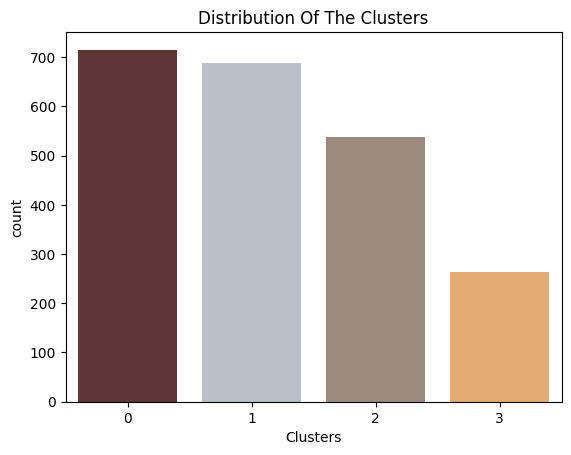

In [57]:
#Plotting countplot of clusters
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=df["Clusters"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

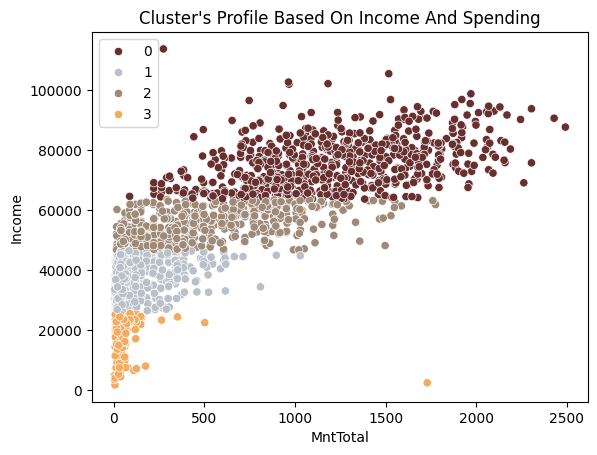

In [58]:
pl = sns.scatterplot(data = df,x=df["MntTotal"], y=df["Income"],hue=df["Clusters"], palette= pal)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 29.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 76.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 35.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 79.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
<ipython-input-61-1dd103636009>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will

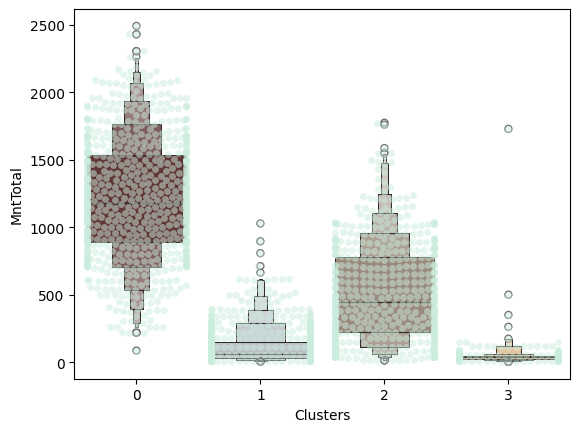

In [61]:
plt.figure()
pl=sns.swarmplot(x=df["Clusters"], y=df["MntTotal"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=df["Clusters"], y=df["MntTotal"], palette=pal)
plt.show()

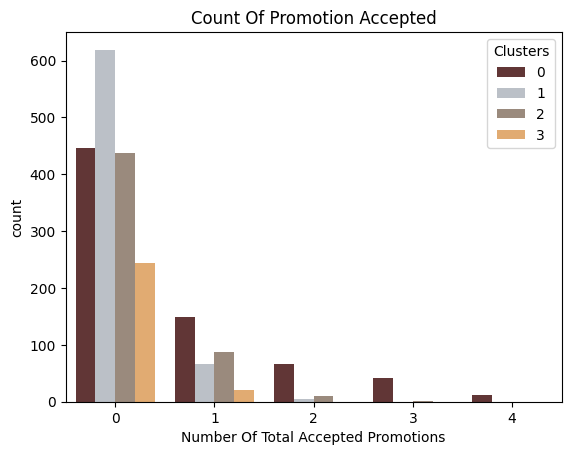

In [63]:
#Creating a feature to get a sum of accepted promotions
df["Total_Promos"] = df["AcceptedCmp1"]+ df["AcceptedCmp2"]+ df["AcceptedCmp3"]+ df["AcceptedCmp4"]+ df["AcceptedCmp5"]
#Plotting count of total campaign accepted.
plt.figure()
pl = sns.countplot(x=df["Total_Promos"],hue=df["Clusters"], palette= pal)
pl.set_title("Count Of Promotion Accepted")
pl.set_xlabel("Number Of Total Accepted Promotions")
plt.show()

There has not been an overwhelming response to the campaigns so far. Very few participants overall. Moreover, no one part take in all 5 of them. Perhaps better-targeted and well-planned campaigns are required to boost sales.

<ipython-input-64-42b888fa19d7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(y=df["NumDealsPurchases"],x=df["Clusters"], palette= pal)


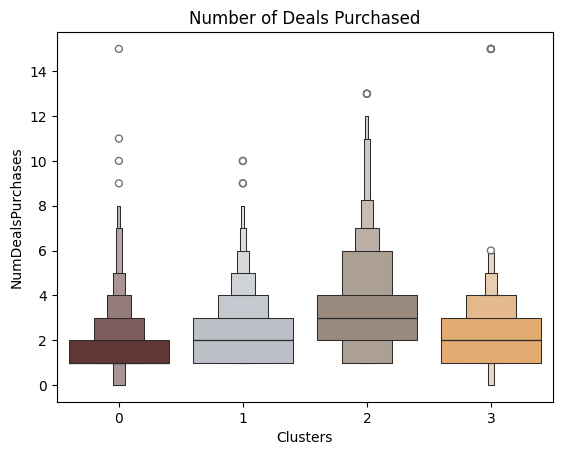

In [64]:
#Plotting the number of deals purchased
plt.figure()
pl=sns.boxenplot(y=df["NumDealsPurchases"],x=df["Clusters"], palette= pal)
pl.set_title("Number of Deals Purchased")
plt.show()

PROFILING

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Income               2205 non-null   float64
 1   Kidhome              2205 non-null   int64  
 2   Teenhome             2205 non-null   int64  
 3   Recency              2205 non-null   int64  
 4   MntWines             2205 non-null   int64  
 5   MntFruits            2205 non-null   int64  
 6   MntMeatProducts      2205 non-null   int64  
 7   MntFishProducts      2205 non-null   int64  
 8   MntSweetProducts     2205 non-null   int64  
 9   MntGoldProds         2205 non-null   int64  
 10  NumDealsPurchases    2205 non-null   int64  
 11  NumWebPurchases      2205 non-null   int64  
 12  NumCatalogPurchases  2205 non-null   int64  
 13  NumStorePurchases    2205 non-null   int64  
 14  NumWebVisitsMonth    2205 non-null   int64  
 15  AcceptedCmp3         2205 non-null   i

In [74]:
# Create a dictionary to map education levels to numerical values
education_map = {'Basic': 1, '2n Cycle': 2, 'Graduation': 3, 'Master': 4, 'PhD': 5}

# Apply the mapping to the 'education' column
df['education'] = df['education'].map(education_map)


<Figure size 640x480 with 0 Axes>

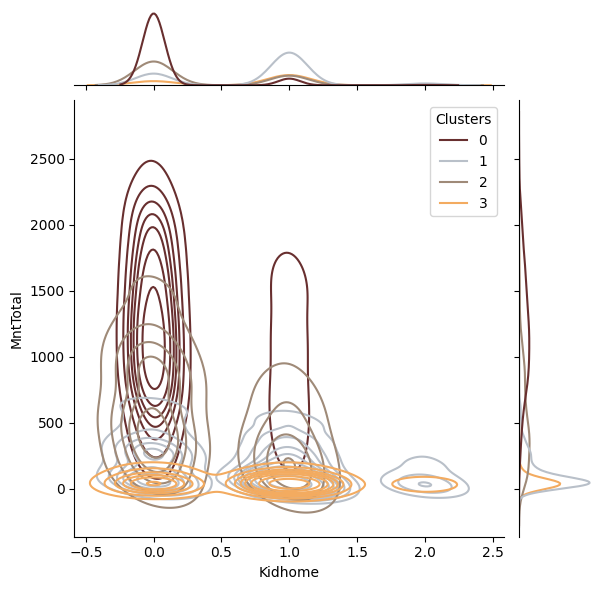

<Figure size 640x480 with 0 Axes>

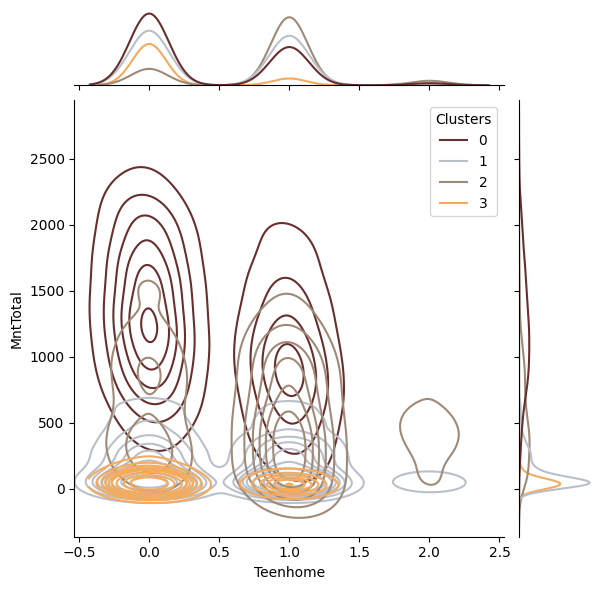

<Figure size 640x480 with 0 Axes>

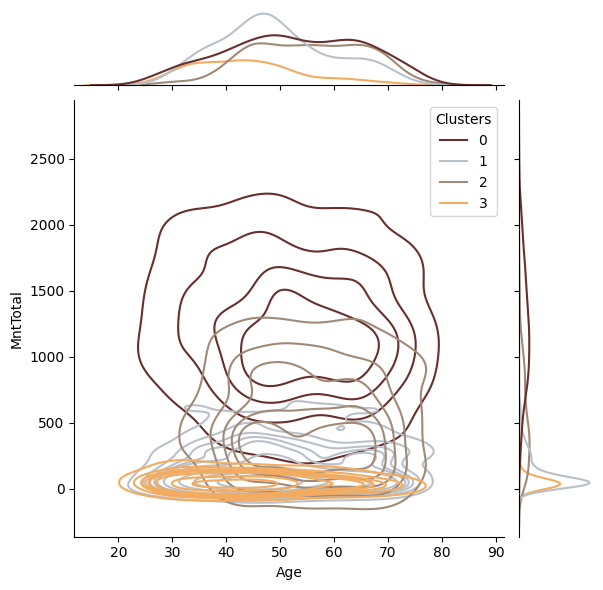

<Figure size 640x480 with 0 Axes>

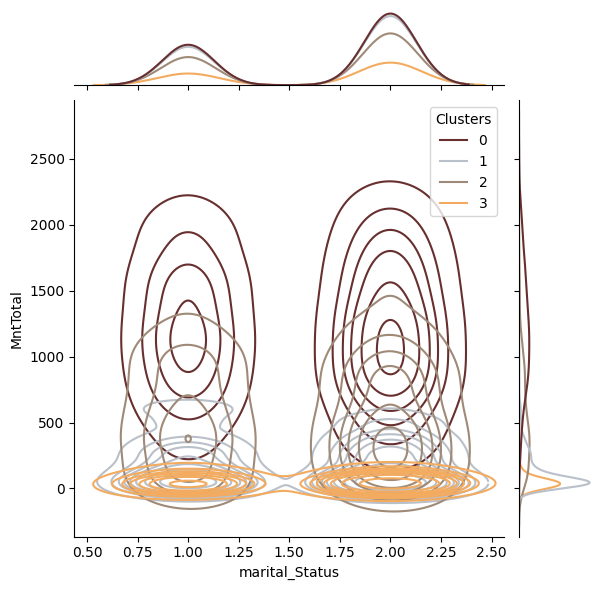

ValueError: The following variable cannot be assigned with wide-form data: `hue`

<Figure size 640x480 with 0 Axes>

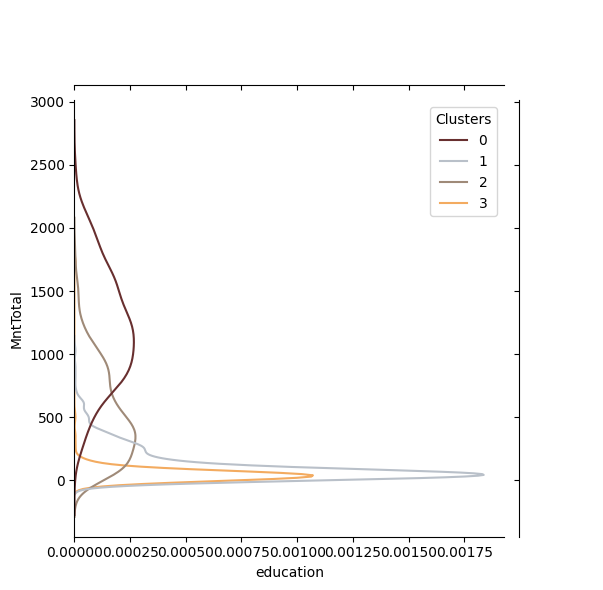

In [76]:
Personal = [ "Kidhome","Teenhome", "Age","marital_Status","education"]

for i in Personal:
    plt.figure()
    sns.jointplot(x=df[i], y=df["MntTotal"], hue =df["Clusters"], kind="kde", palette=pal)
    plt.show()

**CONCLUSION**

In this project, I performed unsupervised clustering. I did use dimensionality reduction followed by agglomerative clustering. I came up with 4 clusters and further used them in profiling customers in clusters according to their family structures and income/spending. This can be used in planning better marketing strategies.